In [6]:
import msprime, pyslim
ts = pyslim.load("/Users/esther/Desktop/remember.trees")
ts

Recapitate tree:

In [4]:
orig_ts = pyslim.load("remember.trees")
rts = orig_ts.recapitate(recombination_rate = 1e-8, Ne=200, random_seed=5)

Check to make sure there is only one root in the end:

In [5]:
orig_max_roots = max(t.num_roots for t in orig_ts.trees())
recap_max_roots = max(t.num_roots for t in rts.trees())
print(f"Before recapitation, the max number of roots was {orig_max_roots}, "
      f"and after recapitation, it was {recap_max_roots}.")

Before recapitation, the max number of roots was 2000, and after recapitation, it was 1.


Simplify Tree and check to see if we have fewer nodes now:

In [7]:
import numpy as np
np.random.seed(3)
alive_inds = rts.individuals_alive_at(0)
keep_indivs = np.random.choice(alive_inds, 10, replace=False)
keep_nodes = []
for i in keep_indivs:
    keep_nodes.extend(rts.individual(i).nodes)
sts = rts.simplify(keep_nodes)
print(f"Before, there were {rts.num_samples} sample nodes (and {rts.num_individuals} individuals) "
       f"in the tree sequence, and now there are {sts.num_samples} sample nodes "
       f"(and {sts.num_individuals} individuals).")

Before, there were 3810 sample nodes (and 1905 individuals) in the tree sequence, and now there are 20 sample nodes (and 12 individuals).


Visualize Trees! 

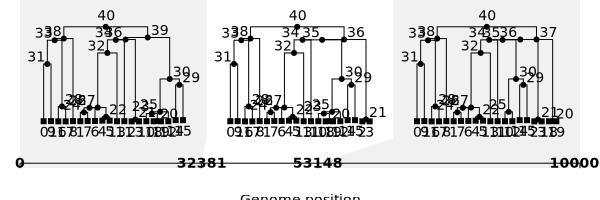

In [8]:
from IPython.display import SVG
SVG(sts.draw_svg())

In [19]:
#YAYYY!!!!!! EVEN BETTER THIS TIME ROUND!!!! 🥳🥳 🎂🎂 🎉🎉🎉

Now, overlay mutations on trees and visualize:

The tree sequence now has 26 mutations, and mean pairwise nucleotide diversity is 5.452631578947368e-05.


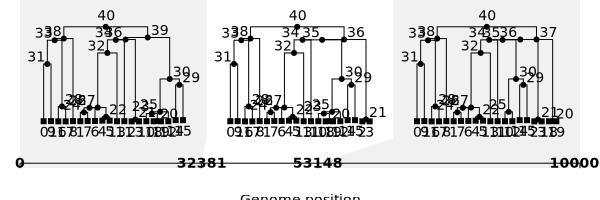

In [9]:
ts = pyslim.SlimTreeSequence(msprime.mutate(sts, rate=1e-8, keep=True))
print(f"The tree sequence now has {ts.num_mutations} mutations, "
      f"and mean pairwise nucleotide diversity is {ts.diversity()}.")
SVG(sts.draw_svg())